In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math
# data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/combined')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/combinedFiltered.csv')
data= data.sort_values(by=['CancerType']).reset_index().drop('index', axis =1)

data.head()


,ENSG00000003400.13,ENSG00000003436.13,ENSG00000004866.17,ENSG00000005073.5,ENSG00000006747.13,ENSG00000007312.11,ENSG00000008735.13,ENSG00000010379.14,ENSG00000011105.10,ENSG00000011201.9,ENSG00000015285.9,ENSG00000016402.11,ENSG00000023892.10,ENSG00000030304.11,ENSG00000037965.5,ENSG00000038295.6,ENSG00000039139.9,ENSG00000039560.12,ENSG00000041353.8,ENSG00000047648.20,ENSG00000047936.9,ENSG00000048740.16,ENSG00000052344.14,ENSG00000053702.13,ENSG00000054793.12,ENSG00000055163.17,ENSG00000058085.13,ENSG00000058866.13,ENSG00000063660.7,ENSG00000064270.11,ENSG00000065060.15,ENSG00000065361.13,ENSG00000065618.15,ENSG00000066405.11,ENSG00000066422.4,ENSG00000066813.13,ENSG00000069122.17,ENSG00000070778.11,ENSG00000071282.10,ENSG00000072864.11,...,ENSG00000269929.1,ENSG00000269937.1,ENSG00000270681.1,ENSG00000271155.1,ENSG00000271824.1,ENSG00000271933.1,ENSG00000272256.1,ENSG00000272501.1,ENSG00000272589.1,ENSG00000272644.1,ENSG00000273001.1,ENSG00000273188.1,ENSG00000273760.1,ENSG00000273796.1,ENSG00000274475.1,ENSG00000274719.1,ENSG00000274978.1,ENSG00000275322.1,ENSG00000275385.1,ENSG00000275410.3,ENSG00000275807.1,ENSG00000276261.1,ENSG00000276517.1,ENSG00000276842.1,ENSG00000277011.1,ENSG00000277135.1,ENSG00000277268.1,ENSG00000277498.1,ENSG00000278058.1,ENSG00000278921.2,ENSG00000279019.1,ENSG00000279059.1,ENSG00000279141.2,ENSG00000279417.1,ENSG00000279685.2,ENSG00000279979.1,ENSG00000280002.1,ENSG00000280285.1,ENSG00000280366.1,CancerType
0,729.2187,162.0486,147.0441,3.0009,145.0435,2347.7042,124.0372,54.0162,74.0222,40.0120,1310.3931,39.0117,1300.3901,18.0054,48.0144,48.0144,227.0681,295.0885,28.0084,128.0384,51.0153,5393.6178,62.0186,64.0192,192.0576,3023.9070,183.0549,87.0261,104.0312,122.0366,965.2895,265.0795,165.0495,25.0075,2004.6013,51.0153,23.0069,75.0225,55.0165,2751.8254,...,6.0018,45.0135,766.2298,9.0027,7.0021,38.0114,317.0951,541.1623,29.0087,4.0012,11.0033,315.0945,3.0009,8.0024,28.0084,7.0021,638.1914,6.0018,0.0000,82.0246,413.1239,34.0102,485.1455,469.1407,5.0015,0.0,21.0063,53.0159,5.0015,8.0024,109.0327,13.0039,24.0072,4.0012,8.0024,0.0000,18.0054,129.0387,13.0039,Blood
1,2311.0826,4368.1642,1046.5280,1.0901,8.7211,130.8160,16.3520,6.5408,22.8928,2.1803,5036.4159,0.0000,4298.3957,0.0000,0.0000,0.0000,2.1803,21.8027,335.7611,49.0560,0.0000,15010.0457,10.9013,248.5504,497.1008,11711.3022,1.0901,508.0021,37.0645,778.3552,4140.3263,11.9915,621.3760,3.2704,3194.0906,0.0000,2.1803,18.5323,53.4165,1599.2256,...,47.9659,59.9573,982.2101,0.0000,0.0000,154.7989,140.6272,560.3285,42.5152,7.6309,8.7211,215.8464,0.0000,5.4507,45.7856,1.0901,2.1803,0.0000,194.0437,1.0901,150.4384,1.0901,375.0059,99.2021,0.0000,0.0,0.0000,5.4507,2.1803,1.0901,50.1461,21.8027,34.8843,1.0901,1.0901,0.0000,0.0000,1.0901,0.0000,Blood
2,458.3776,487.0262,541.2539,0.0000,5.1158,27347.1332,30.6949,1.0232,335.5979,195.4244,3173.8554,3.0695,1710.7306,48.0887,1.0232,130.9650,6.1390,987.3535,6.1390,55.2509,0.0000,5475.9749,21.4864,545.3465,820.5777,39548.3665,115.6176,33.7644,556.6013,10.2316,6300.6453,94.1311,33.7644,7.1621,4393.4672,1.0232,1161.2914,139.1503,159.6136,4303.4287,...,135.0577,37.8571,10.2316,146.3125,21.4864,89.0153,11.2548,526.9296,14.3243,98.2238,13.3011,143.2430,0.0000,1.0232,40.9266,0.0000,25.5791,4.0927,4518.2932,0.0000,152.4515,1.0232,352.9917,272.1617,0.0000,0.0,0.0000,13.3011,3.0695,9.2085,10.2316,517.7211,2.0463,0.0000,4.0927,2.0463,3.0695,3.0695,0.0000,Blood
3,860.7190,30.7779,756.7110,2.1226,2.1226,329.0048,12.7357,21.2261,16.9809,74.2914,1225.8082,2.1226,2022.8488,18.0422,0.0000,0.0000,2.1226,81.7205,1842.4268,21.2261,0.0000,10272.3785,11.6744,200.5868,46.6975,1311.7739,0.0000,1752.2158,197.4029,23.3487,1630.1656,25.4713,96.5788,12.7357,1989.9483,1.0613,1.0613,50.9427,23.3487,1292.6704,...,70.0462,21.2261,10.6131,2.1226,11.6744,125.2341,59.4331,342.8018,9.5518,14.8583,18.0422,36.0844,0.0000,0.0000,25.4713,0.0000,227.1194,0.0000,2.1226,0.0000,38.2070,0.0000,584.7795,200.5868,0.0000,0.0,0.0000,2.1226,20.1648,2.1226,25.4

In [3]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = data.loc[:, data.columns != 'CancerType'].values
# Separating out the target
y = data.loc[:,['CancerType']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)


[[-0.5017765  -0.55770074 -1.217898   ... -0.20871537  0.17740708
   0.22164483]
 [-0.14864238 -0.03127428 -0.56996216 ... -0.29233409 -0.16771429
  -0.2830493 ]
 [-0.56223886 -0.51702739 -0.93393221 ... -0.27807905 -0.16237516
  -0.2830493 ]
 ...
 [-0.24893701  0.22431819  0.33494041 ...  1.15771846  1.19508792
  -0.2830493 ]
 [-0.43324423 -0.47238838 -0.08956824 ... -0.08196232 -0.15843596
  -0.2830493 ]
 [-0.48610171  0.93749527 -0.17430781 ... -0.23510635 -0.06678427
  -0.2830493 ]]


In [0]:
from sklearn.decomposition import PCA

numberOfPCs = 3
pca = PCA(n_components = numberOfPCs)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["principal component " + str(i) for i in range(1,numberOfPCs+1)])



In [5]:
finalDf = pd.concat([principalDf, data[['CancerType']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,CancerType
0,-8.235434,3.011053,0.212966,Blood
1,-11.087557,3.392566,-0.838039,Blood
2,-10.553041,2.053904,-2.359146,Blood
3,-9.553600,2.624247,0.006001,Blood
4,-9.426867,3.613126,-0.571512,Blood


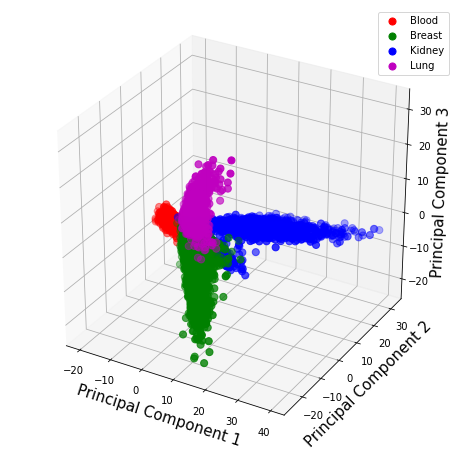

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

# ax.set_title('3 component PCA', fontsize = 20)
ax.grid()

cancers = ['Blood', 'Breast', 'Kidney', 'Lung']
colors = ['r', 'g', 'b', 'm']
for cancer, color in zip(cancers,colors):
    indicesToKeep = finalDf['CancerType'] == cancer
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50
               )
  
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_zscale('log')

ax.legend(cancers)



In [0]:
pca.explained_variance_ratio_
# pca.n_components_ 


array([0.13648492, 0.08510449, 0.04243099])